# Name: Susmita Luitel
# Student ID: 50300628

In [1]:
#Importing the data.
import pandas as pd

#reading csv files
columnNames = ["Age", "Operation Year", "Axillary Node", "Survival Status"]

"""
The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.
   
Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year
"""

data = pd.read_csv("haberman.data", names=columnNames, sep="," , header=None)
print(data)


     Age  Operation Year  Axillary Node  Survival Status
0     30              64              1                1
1     30              62              3                1
2     30              65              0                1
3     31              59              2                1
4     31              65              4                1
..   ...             ...            ...              ...
301   75              62              1                1
302   76              67              0                1
303   77              65              3                1
304   78              65              1                2
305   83              58              2                2

[306 rows x 4 columns]


#### 1. PerformExploratorydataanalysis.

    ○ What can you conclude from methods of central tendency and deviation of
the variables?

    ○ Are there any correlated variables?
    
    ○ Interpret the skewness of the variables.

In [2]:
#Methods of central tendency.
print(data.describe())

print("Conclusion:")
print("From this analysis, we can see how the variables are distributed and average, standard deviation value of each variable ")

              Age  Operation Year  Axillary Node  Survival Status
count  306.000000      306.000000     306.000000       306.000000
mean    52.457516       62.852941       4.026144         1.264706
std     10.803452        3.249405       7.189654         0.441899
min     30.000000       58.000000       0.000000         1.000000
25%     44.000000       60.000000       0.000000         1.000000
50%     52.000000       63.000000       1.000000         1.000000
75%     60.750000       65.750000       4.000000         2.000000
max     83.000000       69.000000      52.000000         2.000000
Conclusion:
From this analysis, we can see how the variables are distributed and average, standard deviation value of each variable 


                      Age  Operation Year  Axillary Node  Survival Status
Age              1.000000        0.089529      -0.063176         0.067950
Operation Year   0.089529        1.000000      -0.003764        -0.004768
Axillary Node   -0.063176       -0.003764       1.000000         0.286768
Survival Status  0.067950       -0.004768       0.286768         1.000000
To remove variables that are correlated.
As per the correlation data and visualization, there are not any correlated variables.


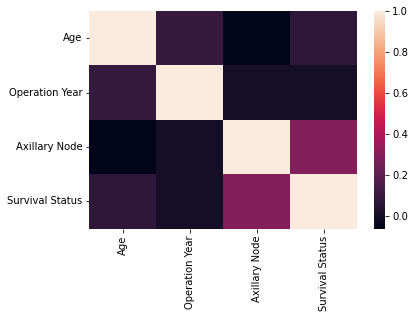

In [3]:
#Correlation
corr = data.corr()
print(corr)

print("To remove variables that are correlated.")

#visualization 

import seaborn as sns

sns.heatmap(corr)

print("As per the correlation data and visualization, there are not any correlated variables.")

Based on the visualization, we can see Age is skewed (pretty much centered)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Operation Year'}>],
       [<AxesSubplot:title={'center':'Axillary Node'}>,
        <AxesSubplot:title={'center':'Survival Status'}>]], dtype=object)

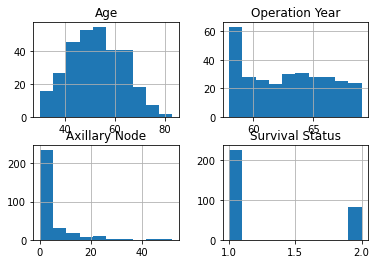

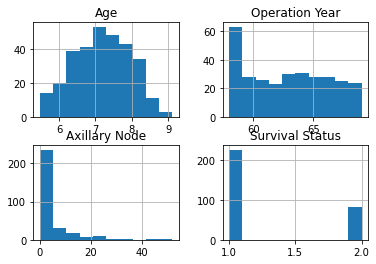

In [4]:
#Skewness of the Variables.

#In order for the Skewness, we can visualize histogram.
data.hist()

print("Based on the visualization, we can see Age is skewed (pretty much centered)")

#Removing Skewness. 
data["Age"] = data["Age"] ** (0.5)

data.hist()

#### 2. Develop Supervised learning models.
○ LogisticRegression

○ RandomForest

○ SupportVectorMachine

○ NeuralNetwork

#### Compare the 4 methods based on the performance metrics and identify the best model for this problem.
- Use 10 - fold cross validation.

- Use GridSearchCV for searching through hyper parameters.

              precision    recall  f1-score   support

           1       0.83      0.95      0.89        96
           2       0.64      0.33      0.44        27

    accuracy                           0.81       123
   macro avg       0.74      0.64      0.66       123
weighted avg       0.79      0.81      0.79       123


10-fold for Logistic Regression
Validation Accuracy for iteration 1 is 0.8421052631578947
Validation Accuracy for iteration 2 is 0.5789473684210527
Validation Accuracy for iteration 3 is 0.7894736842105263
Validation Accuracy for iteration 4 is 0.8333333333333334
Validation Accuracy for iteration 5 is 0.6111111111111112
Validation Accuracy for iteration 6 is 0.8333333333333334
Validation Accuracy for iteration 7 is 0.7777777777777778
Validation Accuracy for iteration 8 is 0.7777777777777778
Validation Accuracy for iteration 9 is 0.7222222222222222
Validation Accuracy for iteration 10 is 0.6111111111111112

The average accuracy from validation: 0.737719298245614




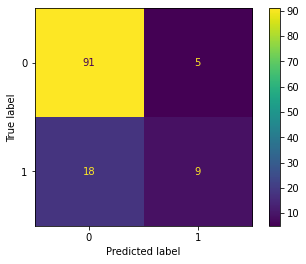

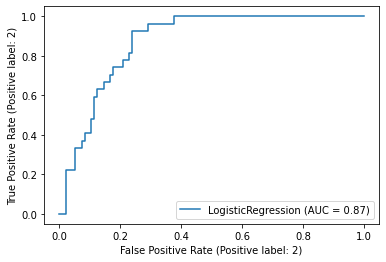

In [5]:
# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

#Create features/inputs
column_Names = ["Age", "Operation Year","Axillary Node"]
X = data[columnNames]

#Create the output/class
y = data["Survival Status"]

#Splitting into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)


#Logistic Regression

#Defining and trainin the model
clf = LogisticRegression(solver = 'lbfgs', penalty = "l2", C = 0.01, random_state=10).fit(X_train,y_train)

#Evaluting the model
clf.score(X_test, y_test)

#Making predictions
y_pred = clf.predict(X_test)

#Displaying Confusion Metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

#Printing performance Metrics
print(classification_report(y_test, y_pred, labels = clf.classes_))

#Plotting ROC Curve.
plot_roc_curve(clf, X_test, y_test)


# Implement k-fold cross validation
print("\n10-fold for Logistic Regression")
# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
average_validation_clf = 0.00
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_validation_clf += clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
    print("Validation Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

average_validation_clf = average_validation_clf / (iteration - 1)
print("\nThe average accuracy from validation: " + str(average_validation_clf))
print("\n")

iteration = 1
average_test_clf = 0.00
for train_indices, test_indices in kf.split(X_test):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_test_clf += clf.score(X_test.iloc[test_indices], y_test.iloc[test_indices])
    print("Test Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_test.iloc[test_indices], y_test.iloc[test_indices])))
    iteration += 1

average_test_clf = average_test_clf / (iteration - 1)
print("\nThe average accuracy from test value: " + str(average_test_clf))
print("\n")

#print("\nImplementing grid search for parameter tuning")    
# Implement grid search for parameter tuning
# parameters = {'solver':( 'lbfgs', 'liblinear', 'sag', 'saga'),
#               'penalty': ['l1', 'l2', 'elasticnet'],
#               'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

# svm_grid = GridSearchCV(clf, param_grid=parameters)
# svm_grid.fit(X_train, y_train)
# svm_grid.best_params_

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        27

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123


10-fold for Random Forest

10-fold for Random Forest:
Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 1.0
Accuracy for iteration 3 is 1.0
Accuracy for iteration 4 is 1.0
Accuracy for iteration 5 is 1.0
Accuracy for iteration 6 is 1.0
Accuracy for iteration 7 is 1.0
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 1.0
Accuracy for iteration 10 is 1.0

The average accuracy from validation: 1.0


Test Accuracy for iteration 1 is 1.0
Test Accuracy for iteration 2 is 1.0
Test Accuracy for iteration 3 is 1.0
Test Accuracy for iteration 4 is 1.0
Test Accuracy for iteration 5 is 1.0
Test Accuracy for iteration 6 is 1.0
Test Accuracy for iteration 7 

{'max_features': 'sqrt', 'n_estimators': 10}

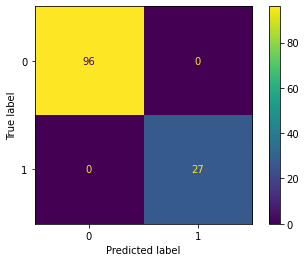

In [6]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
disp.plot()

print(classification_report(y_test, rf_pred, labels = rf.classes_))


print("\n10-fold for Random Forest")
# Specify the number of splits - 10
kf = KFold(n_splits=10)

print("\n10-fold for Random Forest:")
iteration = 1
average_validation_rf = 0.00
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_validation_rf += rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

average_validation_rf = average_validation_rf / (iteration - 1)
print("\nThe average accuracy from validation: " + str(average_validation_rf))
print("\n")
    
iteration = 1
average_test_rf = 0.00
for train_indices, test_indices in kf.split(X_test):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_test_rf += rf.score(X_test.iloc[test_indices], y_test.iloc[test_indices])
    print("Test Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_test.iloc[test_indices], y_test.iloc[test_indices])))
    iteration += 1

average_test_rf = average_test_rf / (iteration - 1)
print("\nThe average accuracy from test value: " + str(average_test_rf))
print("\n")    

print("\nImplementing grid search for parameter tuning")  
parameters_rf = {'max_features':('sqrt', 'log2'), 'n_estimators':[10, 100,1000]}

#For Random Forest
rf_grid = GridSearchCV(estimator=rf, param_grid=parameters_rf)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

              precision    recall  f1-score   support

           1       0.90      0.96      0.93        96
           2       0.81      0.63      0.71        27

    accuracy                           0.89       123
   macro avg       0.86      0.79      0.82       123
weighted avg       0.88      0.89      0.88       123


10-fold for Support Vector Machine:
Accuracy for iteration 1 is 0.9473684210526315
Accuracy for iteration 2 is 0.8947368421052632
Accuracy for iteration 3 is 0.8421052631578947
Accuracy for iteration 4 is 0.8888888888888888
Accuracy for iteration 5 is 0.7777777777777778
Accuracy for iteration 6 is 0.8888888888888888
Accuracy for iteration 7 is 0.6666666666666666
Accuracy for iteration 8 is 0.8888888888888888
Accuracy for iteration 9 is 0.9444444444444444
Accuracy for iteration 10 is 0.7777777777777778

The average accuracy from validation: 0.8517543859649124


Test Accuracy for iteration 1 is 0.8461538461538461
Test Accuracy for iteration 2 is 0.7692307692307693
T

{'C': 1, 'kernel': 'linear'}

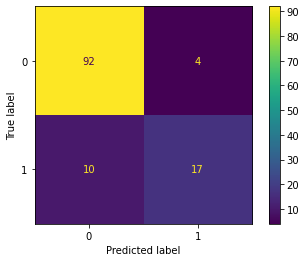

In [7]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 'auto').fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm)
disp.plot()
print(classification_report(y_test, svm_pred, labels = svm.classes_))

print("\n10-fold for Support Vector Machine:")
iteration = 1
average_validation_svm = 0.00
for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_validation_svm += svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

average_validation_svm = average_validation_svm / (iteration - 1)
print("\nThe average accuracy from validation: " + str(average_validation_svm))
print("\n")
    
iteration = 1
average_test_svm = 0.00
for train_indices, test_indices in kf.split(X_test):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_test_svm += svm.score(X_test.iloc[test_indices], y_test.iloc[test_indices])
    print("Test Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_test.iloc[test_indices], y_test.iloc[test_indices])))
    iteration += 1

average_test_svm = average_test_svm / (iteration - 1)
print("\nThe average accuracy from test value: " + str(average_test_svm))
print("\n")    
    
# Implement grid search for parameter tuning
print("\nImplementing grid search for parameter tuning")  
parameters_svm = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters_svm)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        27

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123


For Neural Network:
Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.9473684210526315
Accuracy for iteration 3 is 1.0
Accuracy for iteration 4 is 1.0
Accuracy for iteration 5 is 1.0
Accuracy for iteration 6 is 1.0
Accuracy for iteration 7 is 1.0
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 1.0
Accuracy for iteration 10 is 0.9444444444444444

The average accuracy from validation: 0.9891812865497076


Test Accuracy for iteration 1 is 1.0
Test Accuracy for iteration 2 is 1.0
Test Accuracy for iteration 3 is 1.0
Test Accuracy for iteration 4 is 1.0
Test Accuracy for iteration 5 is 1.0
Test Accuracy for iteration 6 is 1.0
Test Accuracy for i

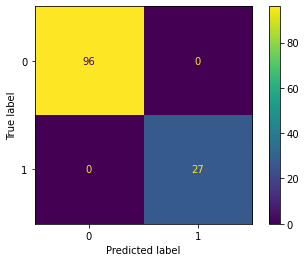

In [8]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn)
disp.plot()
print(classification_report(y_test, nn_pred, labels = nn.classes_))

print("\nFor Neural Network:")
count = 1
average_validation_nn = 0.00
for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_validation_nn += nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
    print("Accuracy for iteration "+ str(count) + " is " + str(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    count += 1

average_validation_nn = average_validation_nn / (iteration - 1)
print("\nThe average accuracy from validation: " + str(average_validation_nn))
print("\n")
    
iteration = 1
average_test_nn = 0.00
for train_indices, test_indices in kf.split(X_test):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    average_test_nn += nn.score(X_test.iloc[test_indices], y_test.iloc[test_indices])
    print("Test Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(X_test.iloc[test_indices], y_test.iloc[test_indices])))
    iteration += 1

average_test_nn = average_test_nn / (iteration - 1)
print("\nThe average accuracy from test value: " + str(average_test_nn))
print("\n")

#For Neural Network
# nn_grid = GridSearchCV(nn, param_grid=parameters_nn, cv=3)
# nn_grid.fit(X_train, y_train)
# nn_grid.best_params_

In [9]:
print("Based on the performance metrics, Model: Random Forest and Neural Network is good.")

Based on the performance metrics, Model: Random Forest and Neural Network is good.


#### 3. Evaluate if the algorithms are overfitting?

In [10]:
#For LogisticRegression
print("\nThe average accuracy from validation: " + str(average_validation_clf))
print("The average accuracy from test value: " + str(average_test_clf))

#For RandomForest
print("\nThe average accuracy from validation: " + str(average_validation_rf))
print("The average accuracy from test value: " + str(average_test_rf))

#For SupportVectorMachine
print("\nThe average accuracy from validation: " + str(average_validation_svm))
print("The average accuracy from test value: " + str(average_test_svm))

#For NeuralNetwork
print("\nThe average accuracy from validation: " + str(average_validation_nn))
print("The average accuracy from test value: " + str(average_test_nn))


print("\nBased on the comparision, we can see that: For SupportVectorMachine, " +
      "the average accuracy of validation is slightly higher and not consider as overfitting")

print("\nWe can conclude there is no overfitting.")


The average accuracy from validation: 0.737719298245614
The average accuracy from test value: 0.7980769230769231

The average accuracy from validation: 1.0
The average accuracy from test value: 1.0

The average accuracy from validation: 0.8517543859649124
The average accuracy from test value: 0.8288461538461538

The average accuracy from validation: 0.9891812865497076
The average accuracy from test value: 1.0

Based on the comparision, we can see that: For SupportVectorMachine, the average accuracy of validation is slightly higher and not consider as overfitting

We can conclude there is no overfitting.


#### 4. Develop a function which can implement machine learning.

              precision    recall  f1-score   support

           1       0.83      0.95      0.89        96
           2       0.64      0.33      0.44        27

    accuracy                           0.81       123
   macro avg       0.74      0.64      0.66       123
weighted avg       0.79      0.81      0.79       123



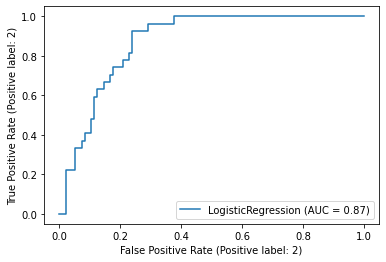

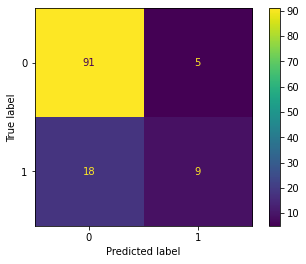

In [11]:
def machine_learning (data, algorithm):
    #Create features/inputs
    column_Names = ["Age", "Operation Year","Axillary Node"]
    X = data[columnNames]
    #Create the output/class
    y = data["Survival Status"]
    #Splitting into training and testing datasets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    
    global algo
    
    if algorithm == "logistic_regression":
        algo = LogisticRegression(solver = 'lbfgs', penalty = "l2", C = 0.01, random_state=10).fit(X_train,y_train)    
    elif algorithm == "random_forest":
        algo = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train) 
    elif algorithm == "support_vector_machine":
        algo = SVC(random_state = 0, kernel = "rbf", gamma = 'auto').fit(X_train, y_train)
    elif algorithm == "neural_network":
        algo = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    else:
        print("Invalid algorithm passed. Accepted Name: logistic_regression, random_forest, support_vector_machine, neural_network")
       
    algo.score(X_test, y_test)
    y_pred = algo.predict(X_test)
    
    #plot ROC curve
    plot_roc_curve(algo, X_test, y_test) 

    #Displaying Confusion Metrics
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    
    #Performace metrics
    return classification_report(y_test, y_pred, labels = algo.classes_)

    
performance_metrics = machine_learning(data, "logistic_regression")
print(performance_metrics)